# Lab 9

### Import libraries and fetch MNIST data

In [2]:
"""
Name: Yi Qian Goh
Date: 11/21/2024
Class: CSEN140 Machine Learning and Data Mining
Brief Description: This program performs K-means clustering on a subset of the MNIST dataset (2000 images) to find K clusters
                of digit 
"""

from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# given code to fetch MNIST dataset and limiting it to 2000 images
mnist = fetch_openml("mnist_784", version=1)
X_full = mnist["data"]
Y_full = mnist["target"]

data = X_full[:2000]
Y = Y_full[:2000].astype(int)  # used later for plotting
print("Data shape", data.shape)
print("Target values array shape", Y.shape)

Data shape (2000, 784)
Target values array shape (2000,)


### Center the data (bring origin of plotted graph to center of all the data points)

In [3]:
data = data - np.mean(data, axis=0)
print("Centered data shape", data.shape)

Centered data shape (2000, 784)


### Compute the covariance matrix of centered matrix

In [4]:
cov = np.dot(data.T, data)/len(data)
print("Covariance matrix shape", cov.shape)

Covariance matrix shape (784, 784)


### Get eigenvalue and eigenvector then sort each in descending order

In [5]:
# get eigenvalue and eigenvector
eigenVal, eigenVec = np.linalg.eigh(cov)  # computes eigenvalues and eigenvectors of a real symmetric matrix
print("Eigenvalue shape", eigenVal.shape)
print("Eigenvector shape", eigenVec.shape)

# sort each in descending order
ascend_sort_indices = np.argsort(eigenVal)  # gives indices of ascending ordered eigenVal
descend_sort_indices = list(reversed(ascend_sort_indices)) # reverse the sort indices
eigenVal = eigenVal[descend_sort_indices]
eigenVec = eigenVec[:, descend_sort_indices]  # sorted eigenvectors are the principal components

Eigenvalue shape (784,)
Eigenvector shape (784, 784)


### Calculate variance of data 

In [6]:
explained_variance = eigenVal / np.sum(eigenVal)
cumulative_variance = np.cumsum(explained_variance)  # each index 'i' of this represents the 'i'th principle component                                                     # high cumulative variance indicates that fewer dimensions are needed to capture the structure of the data
print("\n1 principle component variance:", cumulative_variance[0])
print("2 principle component variance:", cumulative_variance[1])
print("3 principle component variance:", cumulative_variance[2])


1 principle component variance: 0.10009537780124304
2 principle component variance: 0.1747015499327325
3 principle component variance: 0.23933843060972848


### Perform dimensionality reduction

In [7]:
# perform by getting the dot product of principal components with centered image data
pc2 = eigenVec[:, :2]
print("\n2D principle component shape", pc2.shape)
projections_2 = np.dot(data, pc2)
print("2D projections of data onto PCs shape", projections_2)
pc3 = eigenVec[:, :3]
print("\n3D principle component shape", pc3.shape)
projections_3 = np.dot(data, pc3)
print("3D projections of data onto PCs shape", projections_3.shape)


2D principle component shape (784, 2)
2D projections of data onto PCs shape [[ 187.10659691  337.29480598]
 [1085.59987659  440.66003054]
 [ -85.21308734 -452.55904951]
 ...
 [1110.00512829  700.61735908]
 [-439.67379281   88.79905866]
 [1993.21614698  448.10908533]]

3D principle component shape (784, 3)
3D projections of data onto PCs shape (2000, 3)


### Plot 2D projection

   1st Principal Component  2nd Principal Component  Label
0               187.106597               337.294806    5.0
1              1085.599877               440.660031    0.0
2               -85.213087              -452.559050    4.0
3              -916.236610               650.877059    1.0
4              -315.563611              -690.961807    9.0


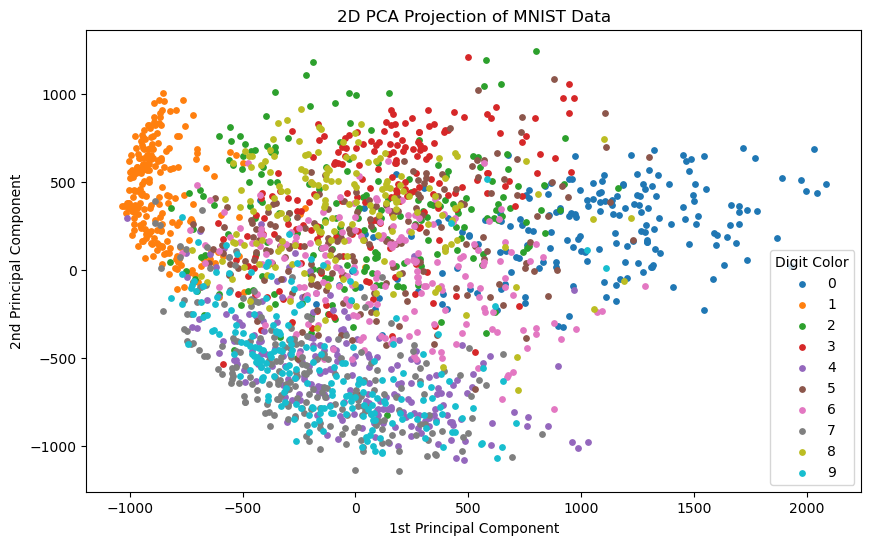

In [8]:
# make array of labels into integers
Y = np.array(Y, dtype=int)

# combine projections and labels into a dataFrame
labeled_projections_2 = np.vstack((projections_2.T, Y)).T
dataframe = pd.DataFrame(data=labeled_projections_2, columns=("1st Principal Component", "2nd Principal Component", "Label"))
print(dataframe.head())

# create scatter plot
plt.figure(figsize=(10, 6))

# color map to make sure each digit has a unique color (https://matplotlib.org/stable/gallery/color/colormap_reference.html)
# cmap = plt.cm.get_cmap("tab20b", len(np.unique(Y)))

# loop through each unique label and plot with a different color
for label in np.unique(Y):
    subset = dataframe[dataframe["Label"] == label]
    #plt.scatter(subset["1st Principal Component"], subset["2nd Principal Component"], label=label, s=15, color=cmap(i))
    plt.scatter(subset["1st Principal Component"], subset["2nd Principal Component"], label=label, s=15)


plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.title("2D PCA Projection of MNIST Data")
plt.legend(title="Digit Color")
plt.show()


### Plot 3D projection

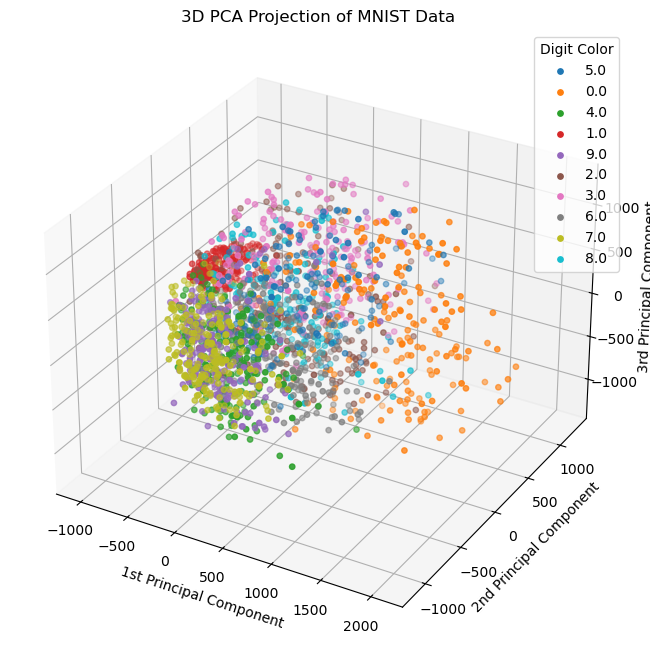

In [9]:
# stack the 3D projection and the labels into a single matrix
labeled_projections_3 = np.vstack((projections_3.T, Y)).T

dataframe_3d = pd.DataFrame(data=labeled_projections_3, columns=("1st Principal Component", "2nd Principal Component", "3rd Principal Component", "Label"))
#print(dataframe.head())

# create the 3D plot using Matplotlib and Seaborn styling
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# plot each label with a different color
for label in dataframe_3d["Label"].unique():
    subset = dataframe_3d[dataframe_3d["Label"] == label]
    ax.scatter(subset["1st Principal Component"], subset["2nd Principal Component"], subset["3rd Principal Component"], label=label, s=15)

ax.set_xlabel('1st Principal Component')
ax.set_ylabel('2nd Principal Component')
ax.set_zlabel('3rd Principal Component')
ax.set_title("3D PCA Projection of MNIST Data")
ax.legend(title="Digit Color")
plt.show()
